In [1]:
pip install --upgrade scikit-learn imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,recall_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [3]:
D=pd.read_csv("D:\ML\churn_ML.csv")

In [4]:
D.head(5)


,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-2 years,tenure_group_2-3 years,tenure_group_3-4 years,tenure_group_4-5 years,tenure_group_5-6 years
0,0,0,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [5]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   int64  
 6   Partner_Yes                            7032 non-null   int64  
 7   Dependents_Yes                         7032 non-null   int64  
 8   PhoneService_Yes                       7032 non-null   int64  
 9   MultipleLines_No phone service         7032 non-null   int64  
 10  MultipleLines_Yes                      7032 non-null   int64  
 11  Inte

In [6]:
D.drop('Unnamed: 0',axis=1,inplace=True)
D.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-2 years,tenure_group_2-3 years,tenure_group_3-4 years,tenure_group_4-5 years,tenure_group_5-6 years
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [7]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int64  
 4   gender_Male                            7032 non-null   int64  
 5   Partner_Yes                            7032 non-null   int64  
 6   Dependents_Yes                         7032 non-null   int64  
 7   PhoneService_Yes                       7032 non-null   int64  
 8   MultipleLines_No phone service         7032 non-null   int64  
 9   MultipleLines_Yes                      7032 non-null   int64  
 10  InternetService_Fiber optic            7032 non-null   int64  
 11  Inte

In [8]:
X=D.drop('Churn',axis=1)
Y=D['Churn']
Y.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

### Splitting into Test & Train Sets

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

### Creating Decision Tree Classifier Model

In [10]:
DT_model=DecisionTreeClassifier(criterion="gini",max_depth=6)
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

In [11]:
Y_pred_dt=DT_model.predict(X_test)
Y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
DT_model.score(X_test,Y_test)

0.7917555081734187

In [13]:
print(classification_report(Y_test,Y_pred_dt,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1046
           1       0.59      0.61      0.60       361

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



#### The accuracy,precision ,recall,F1-score are pretty low, mainly due to using an imbalanced Dataset, where one category has more than 70% data....

So we perform SMOTEEMM analysis on the data :  SMOTE (Synthetic Minority Over-sampling Technique) with ENN (Edited Nearest Neighbors) to handle class imbalance in datasets. This combination aims to balance the dataset while also cleaning up noisy or borderline samples.

In [14]:
sm = SMOTEENN()

In [15]:
X_resampled,Y_resampled=sm.fit_resample(X,Y)

In [16]:
(Y_resampled.value_counts())/len(Y_resampled)

1    0.543893
0    0.456107
Name: Churn, dtype: float64

### Creating Train,Test  sets from resmapled data after performing SMOTEEN resampling

In [17]:
X_rs_train,X_rs_test,Y_rs_train,Y_rs_test=train_test_split(X_resampled,Y_resampled,test_size=0.20,random_state=10)

In [18]:
DT_model_smote=DecisionTreeClassifier(criterion="gini",max_depth=6)
DT_model_smote.fit(X_rs_train,Y_rs_train)

DecisionTreeClassifier(max_depth=6)

In [19]:
Y_rs_pred_dt=DT_model.predict(X_rs_test)
Y_rs_pred_dt

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [20]:
DT_model_smote.score(X_rs_test,Y_rs_test)

0.9115351257588898

In [21]:
print(classification_report(Y_rs_test,Y_rs_pred_dt,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       520
           1       0.97      0.73      0.83       633

    accuracy                           0.84      1153
   macro avg       0.86      0.85      0.84      1153
weighted avg       0.87      0.84      0.84      1153



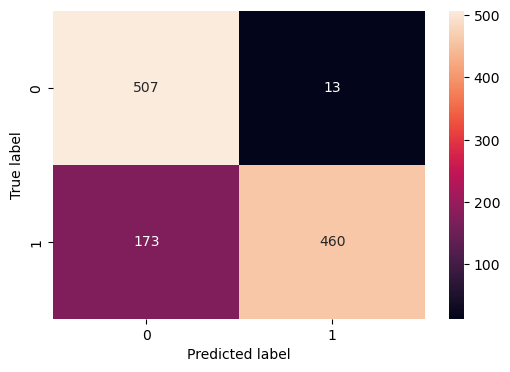

In [39]:
cm=confusion_matrix(Y_rs_test, Y_rs_pred_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

### Creating Random Forest Classifier Model

In [24]:
RF_model=RandomForestClassifier(max_depth=6)
RF_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=6)

In [25]:
RF_model.score(X_test,Y_test)

0.8081023454157783

In [26]:
Y_pred_rf=RF_model.predict(X_test)
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(classification_report(Y_test,Y_pred_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1046
           1       0.69      0.45      0.55       361

    accuracy                           0.81      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.80      0.81      0.79      1407



### Since the precision,recall,f1-score are comparitively low, we now train the RF model using smoteen resampled data

In [29]:
RF_model_smote=RandomForestClassifier(max_depth=6)
RF_model_smote.fit(X_rs_train,Y_rs_train)

RandomForestClassifier(max_depth=6)

In [30]:
RF_model_smote.score(X_rs_test,Y_rs_test)

0.9184735472679966

In [35]:
Y_pred_rs_rf=RF_model_smote.predict(X_rs_test)


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [36]:
print(classification_report(Y_rs_test,Y_pred_rs_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       520
           1       0.90      0.96      0.93       633

    accuracy                           0.92      1153
   macro avg       0.92      0.91      0.92      1153
weighted avg       0.92      0.92      0.92      1153



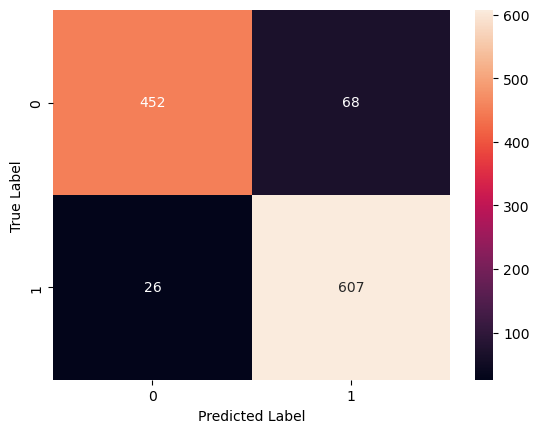

In [41]:
cm=confusion_matrix(Y_rs_test,Y_pred_rs_rf)
sns.heatmap(cm,annot=True,fmt="")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Using pickle to save the model into a file named chrun_model.sav

In [42]:
import pickle
filename='churn_model.sav'
pickle.dump(RF_model_smote,open(filename,'wb'))

In [43]:
load_model=pickle.load(open(filename,'rb'))
load_model.score(X_rs_test,Y_rs_test)

0.9184735472679966